In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
def min_dist(points, res):
  # Create a grid of pixel coordinates
  x = torch.linspace(0, 1, res)
  y = torch.linspace(0, 1, res)
  x_coord, y_coord = torch.meshgrid(x, y)
  
  # Flatten the coordinates into a 2D tensor of shape (res*res, 2)
  coords = torch.stack([x_coord.flatten(), y_coord.flatten()], dim=1)
  
  # Convert the list of input coordinates into a tensor of shape (num_points, 2)
  points = torch.tensor(points)
  
  # Calculate the euclidean distance between each pixel and each input point
  distances = torch.norm(coords[:, None, :] - points[None, :, :], dim=2)
  
  # Take the minimum distance to get the distance to the closest input point
  min_distances = torch.min(distances, dim=1)[0]
  
  # Reshape the minimum distances into a res x res grid
  return min_distances.view(res, res)


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3191.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


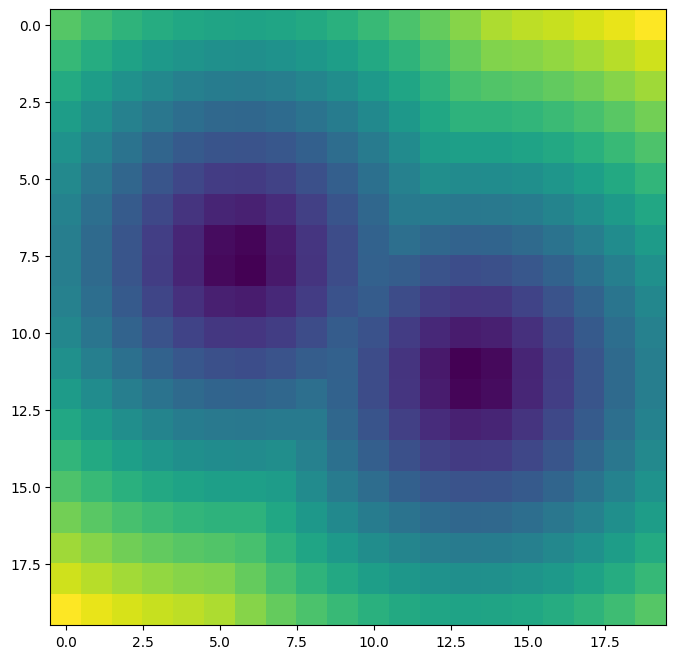

In [3]:
# Case 1:
distance_to_data = min_dist([[0.4, 0.3], [0.6, 0.7]], 20)
plt.figure(figsize=(8, 8))
plt.imshow(distance_to_data)

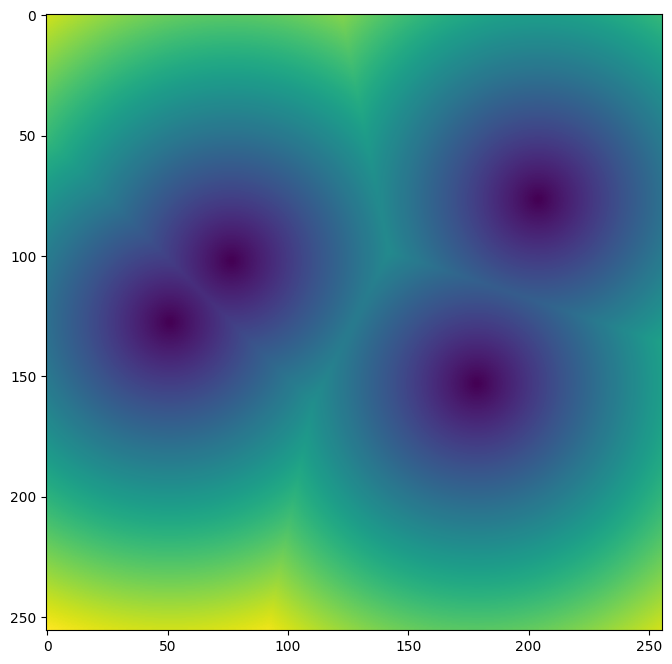

In [4]:
# Case 2:
distance_to_data = min_dist([[0.4, 0.3], [0.6, 0.7], [0.3, 0.8], [0.5, 0.2]], 256)
plt.figure(figsize=(8, 8))
plt.imshow(distance_to_data)